In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
import tensorflow as tf
from IPython.display import display

In [ ]:
df1 = pd.read_csv('/content/train.csv', parse_dates=['Date'], dayfirst=True)
df2 = pd.read_csv('/content/test.csv', parse_dates=['Date'], dayfirst=True)
df3 = pd.read_csv('/content/store.csv')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
print(pd.set_option('display.max_columns', None))

None


In [ ]:
print(df1.duplicated().sum())
print(df2.duplicated().sum())
print(df3.duplicated().sum())

0
0
0


In [ ]:
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
print(df1.isnull().sum())
print(df2.isnull().sum())


Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64
Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64


In [ ]:
print(df2.isnull().sum())


Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64


In [ ]:
print(df3.isnull().sum())

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


In [ ]:
print(df2[df2.isnull().values.any(axis=1)])

          Id  Store  DayOfWeek       Date  Open  Promo StateHoliday  \
479      480    622          4 2015-09-17   NaN      1            0   
1335    1336    622          3 2015-09-16   NaN      1            0   
2191    2192    622          2 2015-09-15   NaN      1            0   
3047    3048    622          1 2015-09-14   NaN      1            0   
4759    4760    622          6 2015-09-12   NaN      0            0   
5615    5616    622          5 2015-09-11   NaN      0            0   
6471    6472    622          4 2015-09-10   NaN      0            0   
7327    7328    622          3 2015-09-09   NaN      0            0   
8183    8184    622          2 2015-09-08   NaN      0            0   
9039    9040    622          1 2015-09-07   NaN      0            0   
10751  10752    622          6 2015-09-05   NaN      0            0   

       SchoolHoliday  
479                0  
1335               0  
2191               0  
3047               0  
4759               0  
5615     

In [ ]:
df2 = df2.dropna()
print(df2.shape)

(41077, 8)


In [ ]:
print(df1['Store'].nunique())

1115


In [ ]:
time0 = pd.Timestamp('2014-08-01 00:00:00')
df1['Date'] = (df1['Date'] - time0).values.astype(float)
print(df1.head())
df2['Date'] = (df2['Date'] - time0).values.astype(float)
print(df2.head())

   Store  DayOfWeek          Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  3.144960e+16   5263        555     1      1            0   
1      2          5  3.144960e+16   6064        625     1      1            0   
2      3          5  3.144960e+16   8314        821     1      1            0   
3      4          5  3.144960e+16  13995       1498     1      1            0   
4      5          5  3.144960e+16   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  
   Id  Store  DayOfWeek          Date  Open  Promo StateHoliday  SchoolHoliday
0   1      1          4  3.559680e+16   1.0      1            0              0
1   2      3          4  3.559680e+16   1.0      1            0              0
2   3      7          4  3.559680e+16   1.0      1            0              0
3   4      8          4  3.559680e+16   1.0      1            0              0
4   

In [ ]:
d_train_store = df1.merge(df3, on=['Store'], how='inner')

d_train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,3.144960e+16,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,3.136320e+16,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,3.127680e+16,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,3.119040e+16,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,3.110400e+16,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


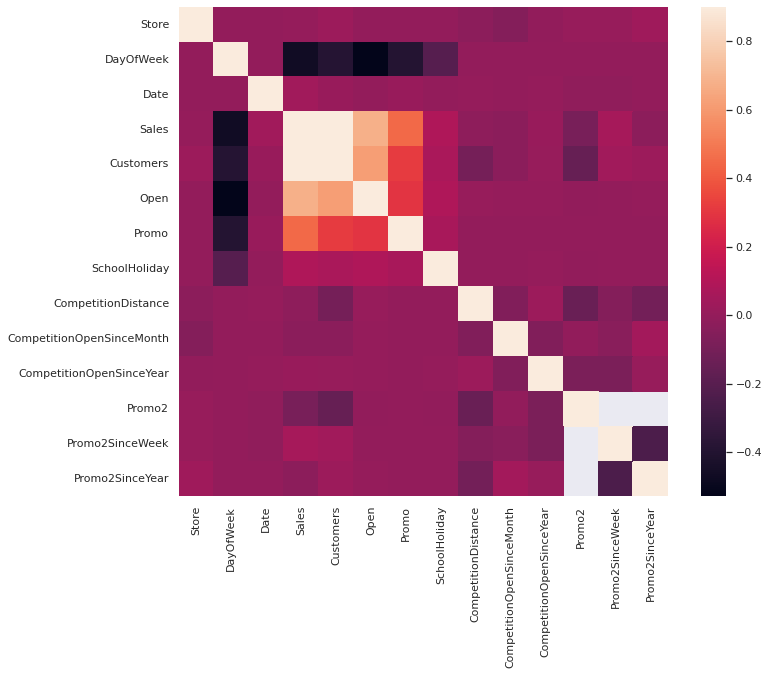

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

corrmat = d_train_store.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [ ]:
print(d_train_store.shape)

(1017209, 18)


In [ ]:
d_test_store = df2.merge(df3, on=['Store'], how='inner')
d_test_store.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,3.559680e+16,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,857,1,3,3.551040e+16,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1713,1,2,3.542400e+16,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,2569,1,1,3.533760e+16,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,3425,1,7,3.525120e+16,0.0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [ ]:
d_train_store.drop('CompetitionOpenSinceMonth',axis=1, inplace=True)
d_train_store.drop('CompetitionOpenSinceYear',axis=1, inplace=True)

d_train_store.drop('Promo2SinceWeek',axis=1, inplace=True)
d_train_store.drop('Promo2SinceYear',axis=1, inplace=True)

d_test_store.drop('CompetitionOpenSinceMonth',axis=1, inplace=True)
d_test_store.drop('CompetitionOpenSinceYear',axis=1, inplace=True)

d_test_store.drop('Promo2SinceWeek',axis=1, inplace=True)
d_test_store.drop('Promo2SinceYear',axis=1, inplace=True)


In [ ]:
d_train_store.drop('PromoInterval', axis=1, inplace=True)
d_test_store.drop('PromoInterval', axis=1, inplace=True)

In [ ]:
d_train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,3.144960e+16,5263,555,1,1,0,1,c,a,1270.0,0
1,1,4,3.136320e+16,5020,546,1,1,0,1,c,a,1270.0,0
2,1,3,3.127680e+16,4782,523,1,1,0,1,c,a,1270.0,0
3,1,2,3.119040e+16,5011,560,1,1,0,1,c,a,1270.0,0
4,1,1,3.110400e+16,6102,612,1,1,0,1,c,a,1270.0,0


In [ ]:
print(d_train_store.dtypes)
print(d_test_store.dtypes)

Store                    int64
DayOfWeek                int64
Date                   float64
Sales                    int64
Customers                int64
Open                     int64
Promo                    int64
StateHoliday            object
SchoolHoliday            int64
StoreType               object
Assortment              object
CompetitionDistance    float64
Promo2                   int64
dtype: object
Id                       int64
Store                    int64
DayOfWeek                int64
Date                   float64
Open                   float64
Promo                    int64
StateHoliday            object
SchoolHoliday            int64
StoreType               object
Assortment              object
CompetitionDistance    float64
Promo2                   int64
dtype: object


In [ ]:
d_train_store.isnull().sum()

Store                     0
DayOfWeek                 0
Date                      0
Sales                     0
Customers                 0
Open                      0
Promo                     0
StateHoliday              0
SchoolHoliday             0
StoreType                 0
Assortment                0
CompetitionDistance    2642
Promo2                    0
dtype: int64

Histogram checking data skewness (Store Data)

In [ ]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

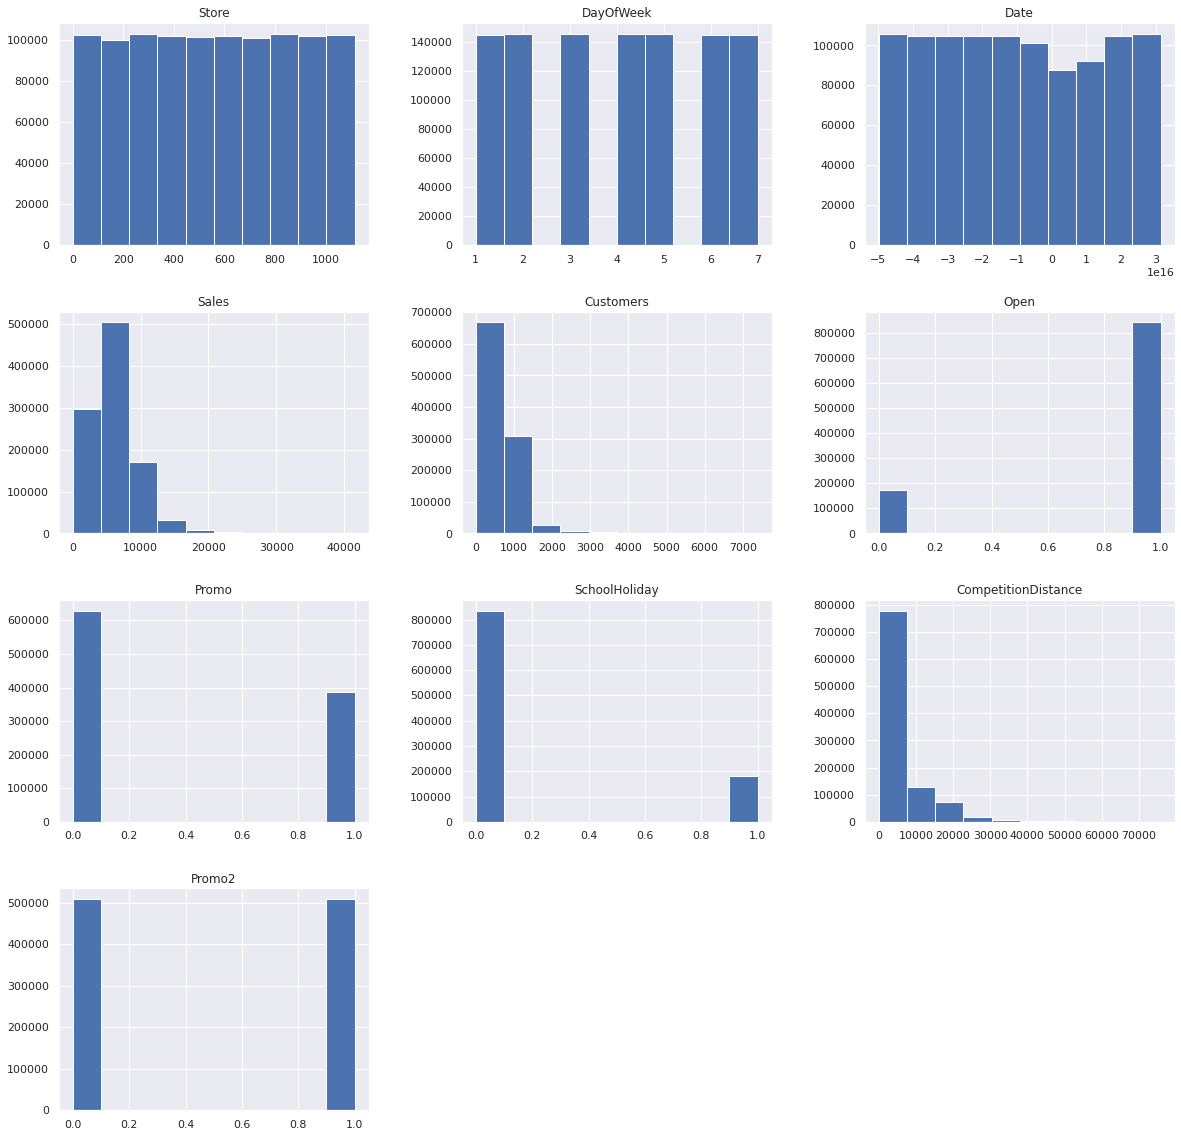

In [ ]:
p = d_train_store.hist(figsize = (20,20))


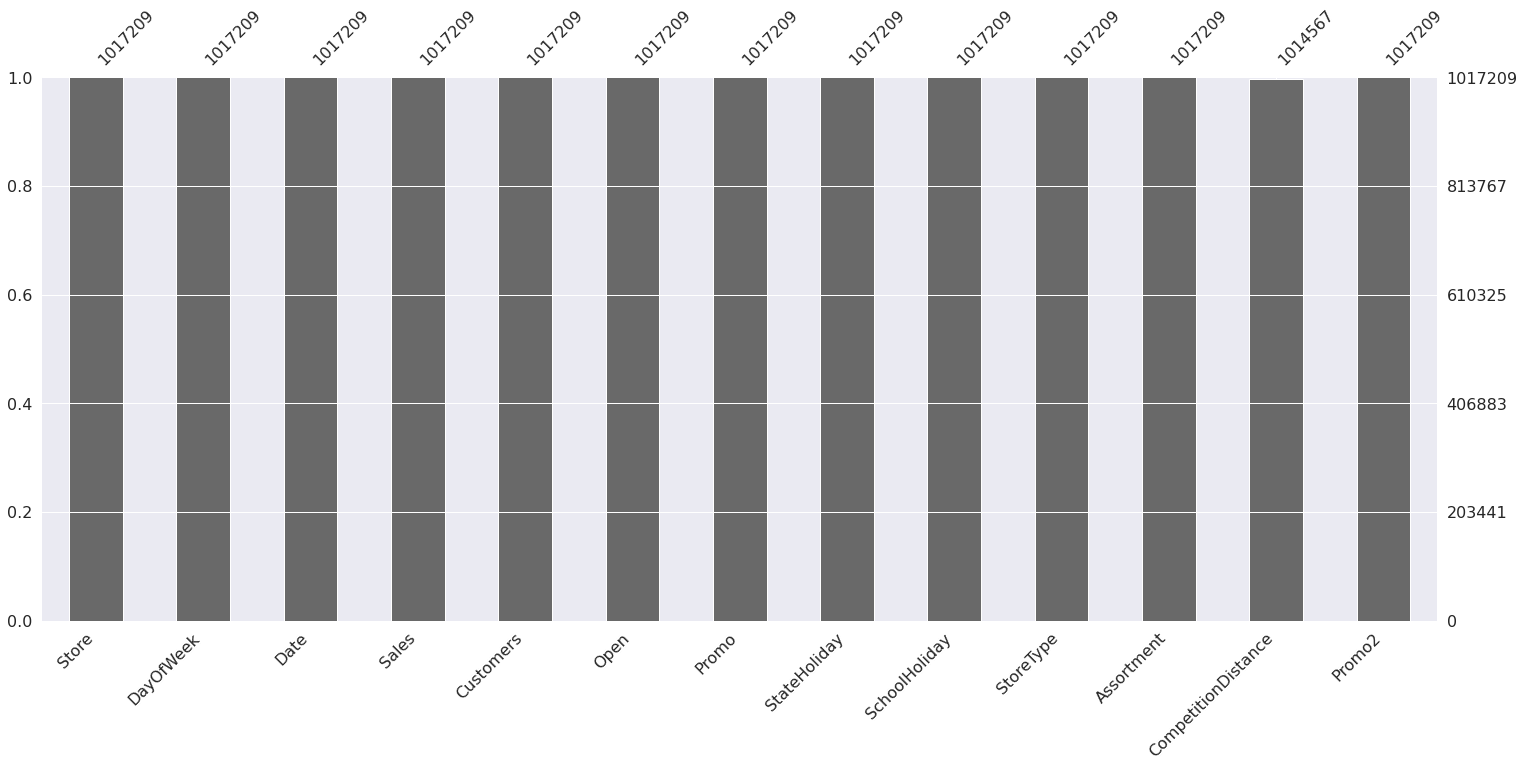

In [ ]:
import missingno as msno
p=msno.bar(d_train_store)

In [ ]:
d_train_store['CompetitionDistance'].isnull().sum()

2642

In [ ]:
d_train_store['CompetitionDistance'].fillna(value=d_train_store['CompetitionDistance'].median(), inplace=True)
d_train_store['CompetitionDistance'] = d_train_store['CompetitionDistance'].astype(int)

In [ ]:
d_test_store['CompetitionDistance'].fillna(value=d_test_store['CompetitionDistance'].median(), inplace=True)
d_test_store['CompetitionDistance'] = d_test_store['CompetitionDistance'].astype(int)

**Encoding** for store (d_train_store) and (d_test_store)

In [ ]:
print(d_train_store.shape,d_test_store.shape)

(1017209, 13) (41077, 12)


In [ ]:
d_train_store = pd.get_dummies(d_train_store, columns=["StateHoliday"])
d_train_store = pd.get_dummies(d_train_store, columns=["StoreType"])
d_train_store = pd.get_dummies(d_train_store, columns=["Assortment"])
d_train_store = pd.get_dummies(d_train_store, columns=["Promo"])
d_train_store = pd.get_dummies(d_train_store, columns=["Promo2"])
d_train_store = pd.get_dummies(d_train_store, columns=["SchoolHoliday"])

d_test_store = pd.get_dummies(d_test_store, columns=["StateHoliday"])
d_test_store = pd.get_dummies(d_test_store, columns=["StoreType"])
d_test_store = pd.get_dummies(d_test_store, columns=["Assortment"])
d_test_store = pd.get_dummies(d_test_store, columns=["Promo"])
d_test_store = pd.get_dummies(d_test_store, columns=["Promo2"])
d_test_store = pd.get_dummies(d_test_store, columns=["SchoolHoliday"])

d_test_store.head

In [ ]:
print(d_train_store.shape, d_test_store.shape)

(1017209, 25) (41077, 21)


In [ ]:
d_train_store.isnull().sum()

Store                  0
DayOfWeek              0
Date                   0
Sales                  0
Customers              0
Open                   0
CompetitionDistance    0
StateHoliday_0         0
StateHoliday_0         0
StateHoliday_a         0
StateHoliday_b         0
StateHoliday_c         0
StoreType_a            0
StoreType_b            0
StoreType_c            0
StoreType_d            0
Assortment_a           0
Assortment_b           0
Assortment_c           0
Promo_0                0
Promo_1                0
Promo2_0               0
Promo2_1               0
SchoolHoliday_0        0
SchoolHoliday_1        0
dtype: int64

In [ ]:
d_train_store.dtypes

Store                    int64
DayOfWeek                int64
Date                   float64
Sales                    int64
Customers                int64
Open                     int64
CompetitionDistance      int64
StateHoliday_0           uint8
StateHoliday_0           uint8
StateHoliday_a           uint8
StateHoliday_b           uint8
StateHoliday_c           uint8
StoreType_a              uint8
StoreType_b              uint8
StoreType_c              uint8
StoreType_d              uint8
Assortment_a             uint8
Assortment_b             uint8
Assortment_c             uint8
Promo_0                  uint8
Promo_1                  uint8
Promo2_0                 uint8
Promo2_1                 uint8
SchoolHoliday_0          uint8
SchoolHoliday_1          uint8
dtype: object

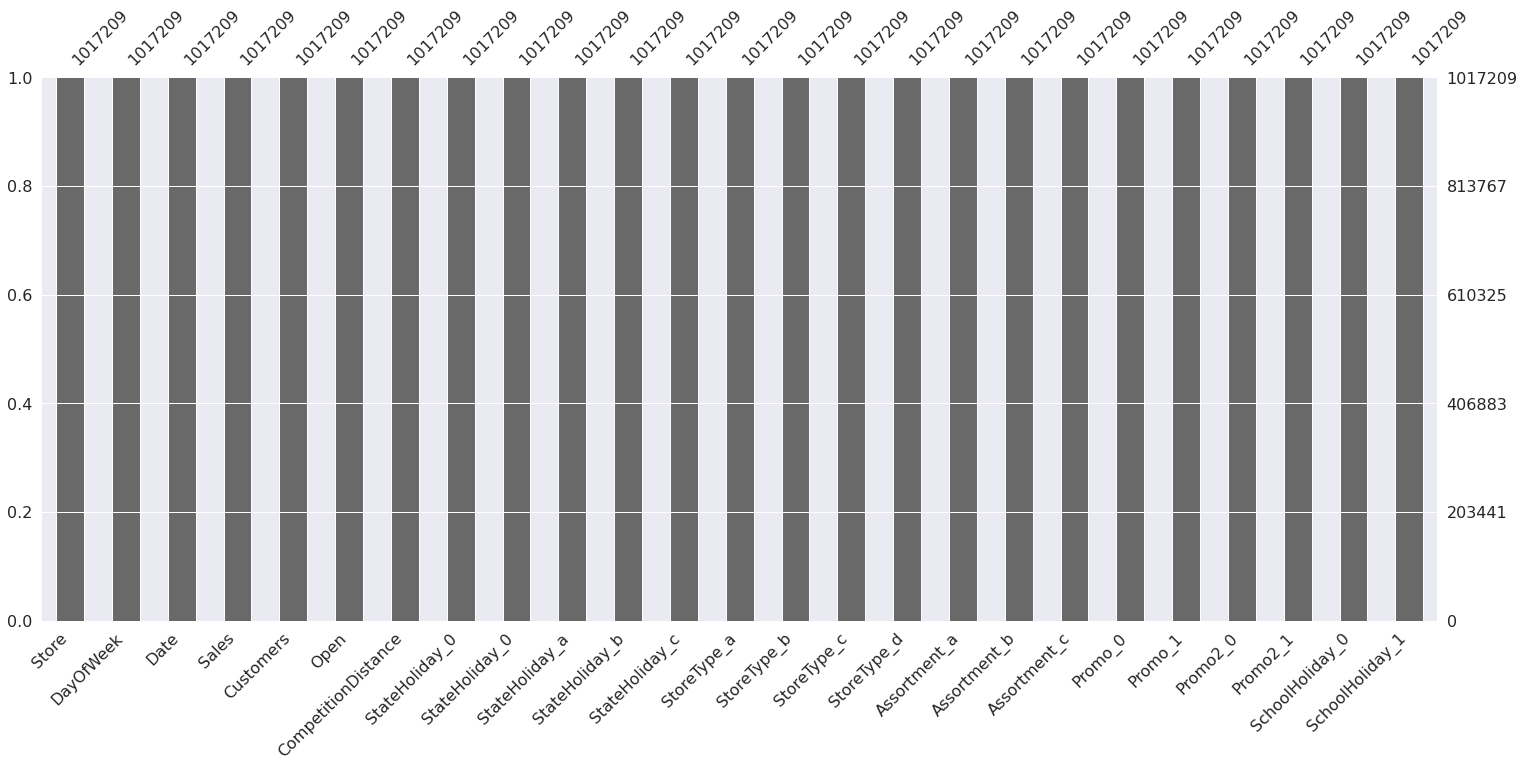

In [ ]:
import missingno as msno
p=msno.bar(d_train_store)

In [ ]:
d_test_store.head()

,Id,Store,DayOfWeek,Date,Open,CompetitionDistance,StateHoliday_0,StateHoliday_a,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,Promo_0,Promo_1,Promo2_0,Promo2_1,SchoolHoliday_0,SchoolHoliday_1
0,1,1,4,3.559680e+16,1.0,1270,1,0,0,0,1,0,1,0,0,0,1,1,0,1,0
1,857,1,3,3.551040e+16,1.0,1270,1,0,0,0,1,0,1,0,0,0,1,1,0,1,0
2,1713,1,2,3.542400e+16,1.0,1270,1,0,0,0,1,0,1,0,0,0,1,1,0,1,0
3,2569,1,1,3.533760e+16,1.0,1270,1,0,0,0,1,0,1,0,0,0,1,1,0,1,0
4,3425,1,7,3.525120e+16,0.0,1270,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0


In [ ]:
d_train_store['Store'].nunique()


1115

In [ ]:
d_train_store.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,CompetitionDistance,StateHoliday_0,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,Promo_0,Promo_1,Promo2_0,Promo2_1,SchoolHoliday_0,SchoolHoliday_1
1017204,1115,6,-4.950720e+16,4771,339,1,5350,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1
1017205,1115,5,-4.959360e+16,4540,326,1,5350,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1
1017206,1115,4,-4.968000e+16,4297,300,1,5350,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1
1017207,1115,3,-4.976640e+16,3697,305,1,5350,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1
1017208,1115,2,-4.985280e+16,0,0,0,5350,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1


In [ ]:
salesMax = d_train_store['Sales'].max()
salesMin = d_train_store['Sales'].min()
d_train_store['Sales'] = (d_train_store['Sales'] - d_train_store['Sales'].min())/(d_train_store['Sales'].max() - d_train_store['Sales'].min())
customersMax = d_train_store['Customers'].max()
customersMin =  d_train_store['Customers'].min()
d_train_store['Customers'] = (d_train_store['Customers'] - d_train_store['Customers'].min())/(d_train_store['Customers'].max()-d_train_store['Customers'].min())
compDistMax = d_train_store['CompetitionDistance'].max()
compDistMin =  d_train_store['CompetitionDistance'].min()
d_train_store['CompetitionDistance'] = (d_train_store['CompetitionDistance']-d_train_store['CompetitionDistance'].min())/(d_train_store['CompetitionDistance'].max()-d_train_store['CompetitionDistance'].min())

d_train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,CompetitionDistance,StateHoliday_0,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,Promo_0,Promo_1,Promo2_0,Promo2_1,SchoolHoliday_0,SchoolHoliday_1
0,1,5,3.144960e+16,0.126664,0.075122,1,0.016482,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1
1,1,4,3.136320e+16,0.120815,0.073904,1,0.016482,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1
2,1,3,3.127680e+16,0.115087,0.070790,1,0.016482,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1
3,1,2,3.119040e+16,0.120599,0.075799,1,0.016482,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1
4,1,1,3.110400e+16,0.146856,0.082837,1,0.016482,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1


In [ ]:
d_test_store.head()

,Id,Store,DayOfWeek,Date,Open,CompetitionDistance,StateHoliday_0,StateHoliday_a,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,Promo_0,Promo_1,Promo2_0,Promo2_1,SchoolHoliday_0,SchoolHoliday_1
0,1,1,4,3.559680e+16,1.0,1270,1,0,0,0,1,0,1,0,0,0,1,1,0,1,0
1,857,1,3,3.551040e+16,1.0,1270,1,0,0,0,1,0,1,0,0,0,1,1,0,1,0
2,1713,1,2,3.542400e+16,1.0,1270,1,0,0,0,1,0,1,0,0,0,1,1,0,1,0
3,2569,1,1,3.533760e+16,1.0,1270,1,0,0,0,1,0,1,0,0,0,1,1,0,1,0
4,3425,1,7,3.525120e+16,0.0,1270,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0


In [ ]:
compDistMax = d_test_store['CompetitionDistance'].max()
compDistMin =  d_test_store['CompetitionDistance'].min()
d_test_store['CompetitionDistance'] = (d_test_store['CompetitionDistance']-d_test_store['CompetitionDistance'].min())/(d_test_store['CompetitionDistance'].max()-d_test_store['CompetitionDistance'].min())

print(d_test_store.info(),d_train_store.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41077 entries, 0 to 41076
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   41077 non-null  int64  
 1   Store                41077 non-null  int64  
 2   DayOfWeek            41077 non-null  int64  
 3   Date                 41077 non-null  float64
 4   Open                 41077 non-null  float64
 5   CompetitionDistance  41077 non-null  float64
 6   StateHoliday_0       41077 non-null  uint8  
 7   StateHoliday_a       41077 non-null  uint8  
 8   StoreType_a          41077 non-null  uint8  
 9   StoreType_b          41077 non-null  uint8  
 10  StoreType_c          41077 non-null  uint8  
 11  StoreType_d          41077 non-null  uint8  
 12  Assortment_a         41077 non-null  uint8  
 13  Assortment_b         41077 non-null  uint8  
 14  Assortment_c         41077 non-null  uint8  
 15  Promo_0              41077 non-null 

In [ ]:
d__store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41077 entries, 0 to 41076
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   41077 non-null  int64  
 1   Store                41077 non-null  int64  
 2   DayOfWeek            41077 non-null  int64  
 3   Date                 41077 non-null  float64
 4   Open                 41077 non-null  float64
 5   CompetitionDistance  41077 non-null  float64
 6   StateHoliday_0       41077 non-null  uint8  
 7   StateHoliday_a       41077 non-null  uint8  
 8   StoreType_a          41077 non-null  uint8  
 9   StoreType_b          41077 non-null  uint8  
 10  StoreType_c          41077 non-null  uint8  
 11  StoreType_d          41077 non-null  uint8  
 12  Assortment_a         41077 non-null  uint8  
 13  Assortment_b         41077 non-null  uint8  
 14  Assortment_c         41077 non-null  uint8  
 15  Promo_0              41077 non-null 

In [ ]:
x = d_train_store.loc[:, d_train_store.columns != 'Sales']
y = d_train_store.loc[:, 'Sales']
print(x.shape, y.shape)

(1017209, 24) (1017209,)


In [ ]:
predicted_df = pd.DataFrame(columns=['Id', 'Sales'])
predicted_df["Id"] = d_test_store.pop('Id')
X_test = d_test_store
X_test = np.resize(X_test, (X_test.shape[0], 1, X_test.shape[1])).astype(float)
predicted = model.predict(X_test)
print(predicted.shape)

In [ ]:
numStores = x['Store'].nunique()
numDays = x['Date'].nunique()
numAttributes = len(x.columns)
print("Dimensions: "+str(numStores)+" "+str(numDays)+" "+str(numAttributes))
print("Reshaped Total: "+str(numAttributes*numDays*numStores))
print("Actual total: "+str(x.size))
print("Difference: "+str(numAttributes*numDays*numStores-x.size))

Dimensions: 1115 942 24
Reshaped Total: 25207920
Actual total: 24413016
Difference: 794904


In [ ]:
(unique, counts) = np.unique(x['Store'], return_counts=True)
frequencies = np.asarray((unique, counts)).T
storesMissingDays = []
for store in frequencies:
  if store[1] < 942:
    storesMissingDays.append(store)
print(len(storesMissingDays))
print(storesMissingDays)

181
[array([ 13, 758]), array([ 20, 758]), array([ 22, 758]), array([ 32, 758]), array([ 36, 758]), array([ 41, 758]), array([ 46, 758]), array([ 51, 758]), array([ 52, 758]), array([ 58, 758]), array([ 72, 758]), array([ 76, 758]), array([ 81, 758]), array([ 89, 758]), array([ 99, 758]), array([100, 758]), array([108, 758]), array([113, 758]), array([115, 758]), array([127, 758]), array([129, 758]), array([132, 758]), array([136, 758]), array([137, 758]), array([139, 758]), array([144, 758]), array([145, 758]), array([149, 758]), array([155, 758]), array([159, 758]), array([164, 758]), array([165, 758]), array([172, 758]), array([174, 758]), array([181, 758]), array([183, 758]), array([186, 758]), array([190, 758]), array([191, 758]), array([192, 758]), array([204, 758]), array([215, 758]), array([218, 758]), array([231, 758]), array([243, 758]), array([258, 758]), array([263, 758]), array([275, 758]), array([277, 758]), array([279, 758]), array([283, 758]), array([284, 758]), array([

In [ ]:
 Can't make reshape to 3d cube (to input into 2dconv) because of missing days in the dataset.
 Was planning on using SMOTE to oversample to the missing days but was not able to make it work.
 input = np.reshape(x, (numStores, numDays, numAttributes))